In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import yfinance as yf
import streamlit as st
from datetime import date

from sklearn.model_selection import train_test_split

In [2]:
stock = pd.read_csv('BBCA.JK.csv',  index_col=0)

df_stock = stock
df_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-06-08,175.0,180.0,175.0,177.5,103.276207,499150000
2004-06-09,177.5,182.5,175.0,180.0,104.730820,294290000
2004-06-10,180.0,180.0,177.5,180.0,104.730820,165590000
2004-06-11,177.5,180.0,177.5,180.0,104.730820,135830000
2004-06-14,180.0,180.0,175.0,177.5,103.276207,158540000


In [3]:
stock.drop(columns = ['Volume'], inplace = True)

In [4]:
def create_train_test_set(data):
    
    features = data.drop(columns=['Close'], axis=1)
    target = data['Close']
    

    data_len = data.shape[0]
    print("Stock Data length: ",str(data_len))

    train_size = int(data_len * 0.7)
    print("Training Set length: ",str(train_size))

    test_size = int(data_len * 0.3)
    test_index = train_size + test_size
    print("Test Set length: ",str(test_size))

    X_train, X_test = features[:train_size], features[train_size:test_index]
    y_train, y_test = target[:train_size], target[train_size:test_index]

    print(X_train.shape, X_test.shape)
    print(y_train.shape, y_test.shape)
    
    return X_train, X_test, y_train, y_test

In [5]:
X_train, X_test, y_train, y_test = create_train_test_set(df_stock)

Stock Data length:  4938
Training Set length:  3456
Test Set length:  1481
(3456, 4) (1481, 4)
(3456,) (1481,)


In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('R2_score:', r2_score(y_test, y_pred) * 100)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error::', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))

R2_score: 99.09444157008463
Mean Absolute Error: 114.17717629003974
Mean Squared Error:: 21129.453878898334
Root Mean Squared Error(RMSE): 145.35973953918028


In [8]:
errors = abs(y_pred - y_test)

print('Mean Absolute Error using Linear Regression:', round(np.mean(errors), 2), 'degrees')
mape = 100 * (errors / y_test)
accuracyLR = 100 - np.mean(mape)
print('Accuracy Linear Regression:', round(accuracyLR, 2), '%.')

Mean Absolute Error using Linear Regression: 114.18 degrees
Accuracy Linear Regression: 98.52 %.


In [9]:
df_pred = pd.DataFrame(y_test.values, columns=['Actual'], index=y_test.index)
df_pred['Predicted'] = y_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

,Date,Actual,Predicted
0,2018-05-21 00:00:00,4330.0,4340.532598
1,2018-05-22 00:00:00,4400.0,4404.069956
2,2018-05-23 00:00:00,4400.0,4444.604924
3,2018-05-24 00:00:00,4490.0,4508.919891
4,2018-05-25 00:00:00,4510.0,4524.448447
...,...,...,...
1476,2024-05-17 00:00:00,9750.0,10061.761256
1477,2024-05-20 00:00:00,9475.0,9924.344557
1478,2024-05-21 00:00:00,9375.0,9770.831868
1479,2024-05-22 00:00:00,9425.0,9768.584360


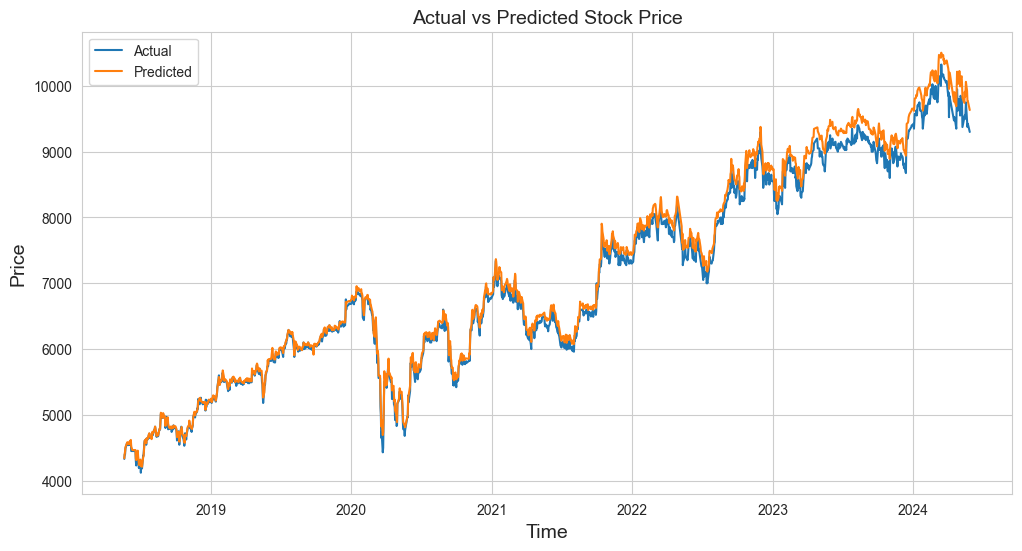

In [10]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(df_pred['Date'], df_pred['Actual'], label='Actual')
plt.plot(df_pred['Date'], df_pred['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Stock Price', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc='best')
plt.show()